In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
%matplotlib inline

In [2]:
data_df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
data_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = data_df.drop('species', axis=1)
label = data_df['species']

In [5]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Normalizing data points

In [6]:
for column in features.columns:
    features[column] = (features[column] - features[column].min()) / (features[column].max() - features[column].min())

# Initialize centroids

In [7]:
def get_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) 

# Assign label to each observation

In [8]:
def get_labels(centroids, data):
    distances = centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [9]:
def new_centroids(data, k, labels):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [10]:
def plot_clusters(data, k, iteration, labels, centroids):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:,0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    plt.show()

In [11]:
def k_means(data, k):
    max_iterations = 100

    centroids = get_centroids(data, k)
    old_centroids = pd.DataFrame()
    iteration = 1
    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(centroids, data)
        centroids = new_centroids(data, k, labels)
        plot_clusters(data, k, iteration, labels, centroids)
        iteration += 1

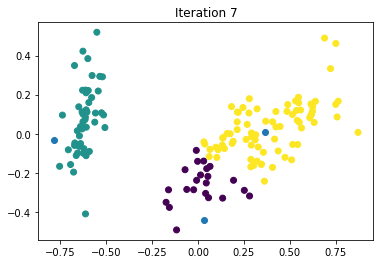

In [12]:
k_means(features, 4)